In [1]:
import pandas as pd

housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

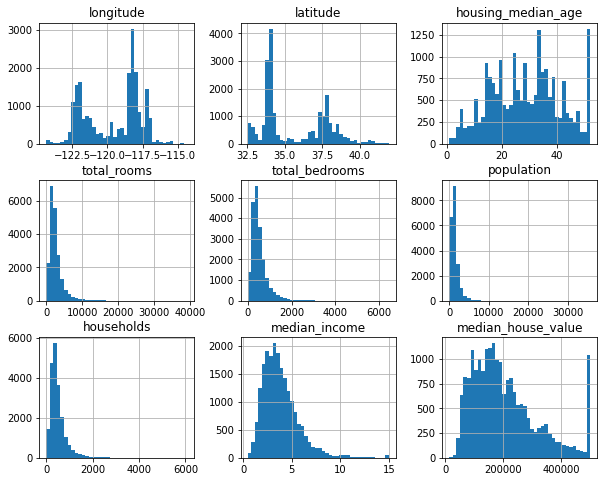

In [14]:
import matplotlib.pyplot as plt
housing.hist(bins=40, figsize=(10, 8))
plt.show()

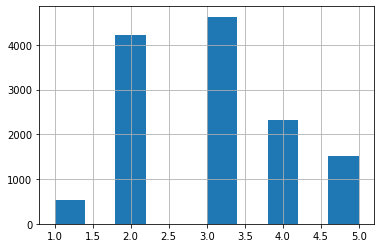

In [34]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index,:]
    strat_test_set = housing.iloc[test_index,:]

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
housing = strat_train_set.copy()

C:\Users\bgiri\AppData\Local\Temp\ipykernel_34040\649015884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\bgiri\AppData\Local\Temp\ipykernel_34040\649015884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [44]:
corr_matrix = housing.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924417,-0.113888,0.049810,0.076900,0.110350,0.064472,-0.019923,-0.046705
latitude,-0.924417,1.000000,0.013353,-0.040389,-0.073026,-0.118700,-0.079633,-0.073515,-0.141320
housing_median_age,-0.113888,0.013353,1.000000,-0.365312,-0.328196,-0.292350,-0.306825,-0.110117,0.106001
total_rooms,0.049810,-0.040389,-0.365312,1.000000,0.929513,0.849949,0.917135,0.201406,0.137023
total_bedrooms,0.076900,-0.073026,-0.328196,0.929513,1.000000,0.873951,0.980331,-0.007543,0.046623
population,0.110350,-0.118700,-0.292350,0.849949,0.873951,1.000000,0.901804,0.002107,-0.025276
households,0.064472,-0.079633,-0.306825,0.917135,0.980331,0.901804,1.000000,0.011452,0.064200
median_income,-0.019923,-0.073515,-0.110117,0.201406,-0.007543,0.002107,0.011452,1.000000,0.690191
median_house_value,-0.046705,-0.141320,0.106001,0.137023,0.046623,-0.025276,0.064200,0.690191,1.000000


array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

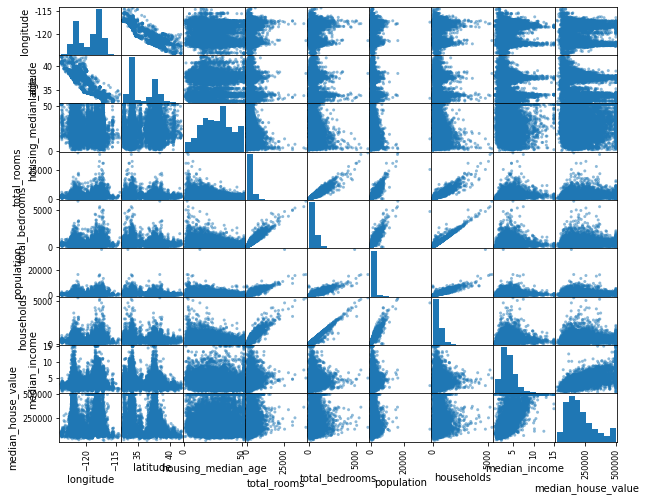

In [43]:
pd.plotting.scatter_matrix(housing,figsize=(10, 8))

In [45]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.690191
rooms_per_household         0.163330
total_rooms                 0.137023
housing_median_age          0.106001
households                  0.064200
total_bedrooms              0.046623
population_per_household   -0.016056
population                 -0.025276
longitude                  -0.046705
latitude                   -0.141320
bedrooms_per_room          -0.272104
Name: median_house_value, dtype: float64


In [54]:
housing = strat_train_set.drop("median_house_value", axis=1, inplace=False)
housing_labels = strat_train_set["median_house_value"].copy()

#fill nulls with median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1, inplace=False)

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
set_config(display="diagram")

num_pipeline.fit_transform(housing_num)

array([[ 1.08168071, -0.76265737,  0.17545303, ..., -0.48178421,
         0.03497939,  0.67109209],
       [ 0.7826775 , -0.83725603,  0.09611664, ..., -0.1035651 ,
        -0.01188744, -0.0573147 ],
       [ 0.54845833, -0.75333254,  0.96881697, ..., -0.62906921,
        -0.10186888,  0.66303764],
       ...,
       [-1.12595961,  0.81323931,  0.17545303, ..., -0.34654765,
         0.01828965,  0.28183531],
       [ 0.8574283 , -0.73468287, -0.37990173, ...,  0.46127806,
        -0.01045435, -0.83436217],
       [-0.07446501,  0.50551984, -1.09392927, ...,  0.75668082,
         0.01396922, -1.06750949]])

In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [114]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.08168071, -0.76265737,  0.17545303, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7826775 , -0.83725603,  0.09611664, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54845833, -0.75333254,  0.96881697, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12595961,  0.81323931,  0.17545303, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8574283 , -0.73468287, -0.37990173, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07446501,  0.50551984, -1.09392927, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

ols = sm.OLS(housing_labels,sm.add_constant(housing_prepared))
lin_reg=ols.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:46:56   Log-Likelihood:            -1.3268e+05
No. Observations:               10567   AIC:                         2.654e+05
Df Residuals:                   10551   BIC:                         2.655e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.05e+05   1.15e+04     17.858      0.000    1.82e+05    2.27e+05
x1         -5.533e+04   2875.943    -19.239      0.000    -6.1e+04   -4.97e+04
x2         -5.663e+04   3023.066    -18.732      0.000   -6.26e+04   -5.07e+04
x3          1.314e+04    770.625     17.050      0.000    1.16e+04    1.46e+04
x4         -4839.2038   2716.816     -1.781      0.075   -1.02e+04     486.270
x5          5595.5075   3973.265      1.408      0.159   -2192.843    1.34e+04
x6         -4.378e+04   1691.758    -25.877      0.000   -4.71e+04   -4.05e+04
x7          4.776e+04   3857.339     12.383      0.000    4.02e+04    5.53e+04
x8          7.388e+04    940.960     78.516      0.000     7.2e+04    7.57e+04
x9          8788.8948    848.544     10.358      0.000    7125.588    1.05e+04
x10          929.3334    693.977      1.339      0.181    -430.993    2289.660
x11         7905.5948    977.211      8.090      0.000    5990.076    9821.113
x12         1.464e+04   1.15e+04      1.272      0.203   -7916.119    3.72e+04
x13        -2.442e+04   1.16e+04     -2.098      0.036   -4.72e+04   -1607.685
x14         1.894e+05   5.73e+04      3.305      0.001    7.71e+04    3.02e+05
x15         9476.2478   1.16e+04      0.815      0.415   -1.33e+04    3.23e+04
x16         1.586e+04   1.16e+04      1.370      0.171   -6842.098    3.86e+04
==============================================================================
Omnibus:                     2774.217   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13117.362
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       7.905   Cond. No.                     2.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.74e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
housing_test = strat_test_set.drop("median_house_value", axis=1, inplace=False)
housing_teat_labels = strat_test_set["median_house_value"].copy()
data_preparation = full_pipeline.transform(housing_test)
y_pred=lin_reg.predict(data_preparation)
y_pred

array([279954.71198649,  67302.03215658, 332826.96631597, ...,
        96938.68715362, 177275.67367195,  48098.00895838])

In [95]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(housing_teat_labels, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(housing_teat_labels, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(housing_teat_labels, y_pred)))

Mean Absolute Error: 49031.65812500244
Mean Squared Error: 4531635842.1424055
Root Mean Squared Error: 67317.4259916584
